In [12]:
import pickle
import numpy as np
with open('C:/Users/duyma/Documents/GitHub/Speaker-Recognize/Data/LibriSpeech/my_dict_30+1.pkl', 'rb') as f:
    my_dict = pickle.load(f)
my_dict
x=[]
y=[]
for i in my_dict:
    y.append(i['speaker'])
    x.append(i['cepstrum'])
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# create an example list of labels
labels = y
# create a LabelEncoder object
le = LabelEncoder()
# fit the encoder to the labels and transform the labels
y = le.fit_transform(labels)
print(len(le.classes_))
# print the original labels and the encoded labels
print("Original labels:", labels)
print("Encoded labels:", y)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
# Save the encoded data as a NumPy array
np.save('encoded_data.npy', y)
x=np.array(x)


y_train, y_test, x_train, x_test = train_test_split(y, x, test_size=0.2, stratify=y, random_state=42)

31
Original labels: ['F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F1', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', 'F10', '

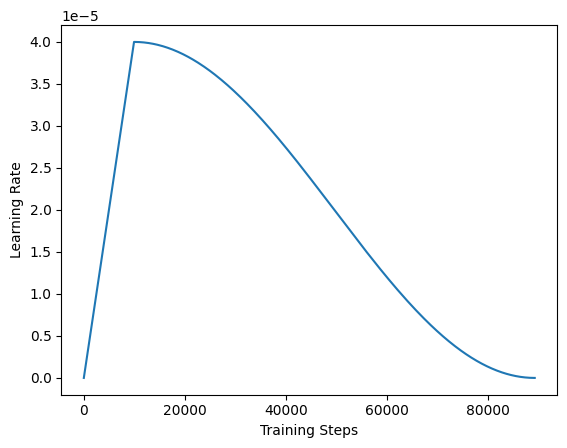

Epoch 1/360
248/248 [==============================] - 25s 96ms/step - loss: 3.5427 - sparse_categorical_accuracy: 0.0106 - val_loss: 3.5350 - val_sparse_categorical_accuracy: 0.0121
Epoch 2/360
248/248 [==============================] - 23s 94ms/step - loss: 3.5347 - sparse_categorical_accuracy: 0.0176 - val_loss: 3.5280 - val_sparse_categorical_accuracy: 0.0524
Epoch 3/360
248/248 [==============================] - 23s 93ms/step - loss: 3.5273 - sparse_categorical_accuracy: 0.0454 - val_loss: 3.5211 - val_sparse_categorical_accuracy: 0.0565
Epoch 4/360
248/248 [==============================] - 24s 95ms/step - loss: 3.5209 - sparse_categorical_accuracy: 0.0600 - val_loss: 3.5142 - val_sparse_categorical_accuracy: 0.1069
Epoch 5/360
248/248 [==============================] - 23s 91ms/step - loss: 3.5135 - sparse_categorical_accuracy: 0.1104 - val_loss: 3.5073 - val_sparse_categorical_accuracy: 0.1129
Epoch 6/360
248/248 [==============================] - 23s 91ms/step - loss: 3.5071 -

h:\pythond\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf

# Set the fraction of GPU memory to be allocated

    # Your TensorFlow training code here

    # Load the pre-trained model
pretrained_model = load_model("C:/VN_speaker.h5")

for layer in pretrained_model.layers:
    layer.trainable = False

# Thêm lớp mới cho phần phân loại với số lượng lớp đầu ra mới
num_classes = 31

prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax', name='my_prediction_layer')(pretrained_model.output)

# Tạo mô hình mới
model = tf.keras.Model(inputs=pretrained_model.input, outputs=prediction_layer)

initial_learning_rate = 4e-5
total_steps = 89280
warmup_steps = 9920

# Create a learning rate schedule with cosine annealing and warmup
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate,
    decay_steps=total_steps - warmup_steps,
    alpha=4e-6  # Minimum learning rate, usually set to 0
)

# Optionally, add warmup to the learning rate schedule
def warmup_lr_schedule(step):
    if step < warmup_steps:
        return initial_learning_rate * (step / warmup_steps)
    else:
        return lr_schedule(step - warmup_steps)

# Sau warm-up step, chuyển sang tốc độ học chính thức
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Tiếp tục huấn luyện với tốc độ học chính thức
plt.plot(range(total_steps), [warmup_lr_schedule(step) for step in range(total_steps)])
plt.xlabel('Training Steps')
plt.ylabel('Learning Rate')
plt.show()
# Compile the model if necessary (if it's not already compiled)

# Load your new dataset or define new training data
# new_data = load_data('new_dataset')

# Fine-tune the model on new data
model.fit(x_train, y_train, batch_size=8, epochs=360, validation_split=0.2)
model.evaluate(x_test, y_test, verbose=1)
# Save the fine-tuned model
model.save('fine_tuned_model_fromVN+bomman.h5')

In [16]:
import numpy as np

# Dự đoán trên tập dữ liệu validation
predictions = model.predict(x_train)

# Chuyển đổi dự đoán thành các nhãn (ví dụ: từ một phân phối xác suất sang các nhãn dự đoán)
predicted_labels = np.argmax(predictions, axis=1)

# Tính toán độ chính xác cho từng nhãn
correct_labels = np.argmax(y_train)
accuracy_per_label = {}
for label in range(num_classes):  # Thay num_classes bằng số lượng nhãn trong bài toán của bạn
    mask = (correct_labels == label)
    if np.sum(mask) > 0:  # Đảm bảo rằng có ít nhất một mẫu trong tập dữ liệu thuộc vào nhãn này
        accuracy_per_label[label] = np.mean(predicted_labels[mask] == correct_labels[mask])
    else:
        accuracy_per_label[label] = 0.1  # Gán độ chính xác là 0 nếu không có mẫu nào trong nhãn này

# In ra độ chính xác của từng nhãn
for label, accuracy in accuracy_per_label.items():
    print(f'Accuracy for label {label}: {accuracy}')


78/78 [==============================] - 15s 195ms/step
Accuracy for label 0: 0.1
Accuracy for label 1: 0.1
Accuracy for label 2: 0.1
Accuracy for label 3: 0.1
Accuracy for label 4: 0.1
Accuracy for label 5: 0.1
Accuracy for label 6: 0.1
Accuracy for label 7: 0.1
Accuracy for label 8: 0.1
Accuracy for label 9: 0.1
Accuracy for label 10: 0.1
Accuracy for label 11: 0.1
Accuracy for label 12: 0.1
Accuracy for label 13: 0.1
Accuracy for label 14: 0.1
Accuracy for label 15: 0.1
Accuracy for label 16: 0.1
Accuracy for label 17: 0.1
Accuracy for label 18: 0.02903225806451613
Accuracy for label 19: 0.1
Accuracy for label 20: 0.1
Accuracy for label 21: 0.1
Accuracy for label 22: 0.1
Accuracy for label 23: 0.1
Accuracy for label 24: 0.1
Accuracy for label 25: 0.1
Accuracy for label 26: 0.1
Accuracy for label 27: 0.1
Accuracy for label 28: 0.1
Accuracy for label 29: 0.1
Accuracy for label 30: 0.1
